In [ ]:
import numpy as np
import pandas as pd
import math
df=pd.read_csv('/content/credit dataa.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp
import math

In [ ]:
from google.colab import drive
drive.mount('/content/credit dataa.csv')

ValueError: ignored

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [ ]:
df.isnull().sum()


Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().iloc[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().iloc[0])



In [ ]:
#df=df.fillna(df.mode().iloc[0])
df.isnull().sum()




Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

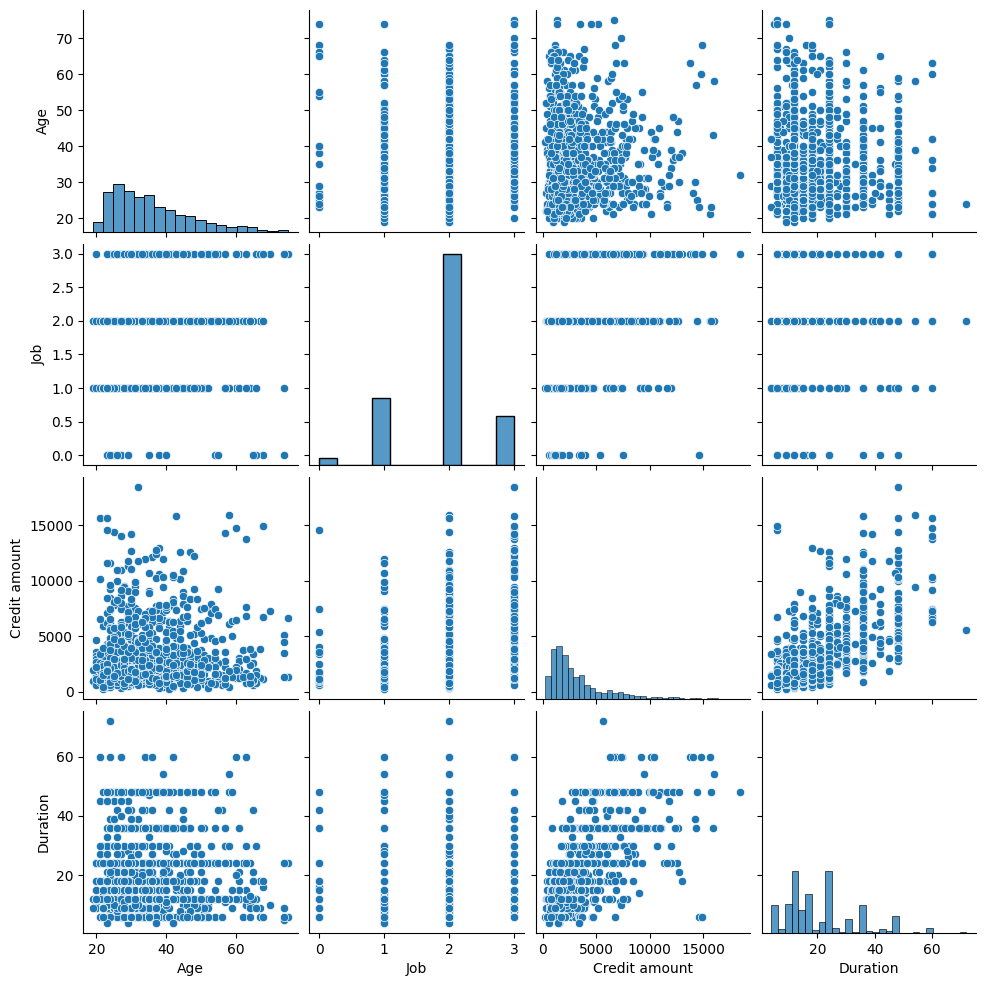

In [ ]:
sns.pairplot(df)

Distribution of credit amount, age and duration

In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp


# Determine the range of Age and Credit amount
age_range = [df['Age'].min(), df['Age'].max()]
credit_range = [df['Credit amount'].min(), df['Credit amount'].max()]

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Distribution of Age', 'Distribution of Credit Amount'))

# Add histograms to subplots
fig.add_trace(
    go.Histogram(x=df['Age'], nbinsx=30, name='Age', marker_color='skyblue',
                 xbins=dict(start=age_range[0], end=age_range[1], size=(age_range[1]-age_range[0])/30),
                 autobinx=False, autobiny=False, marker=dict(color='skyblue', line=dict(color='black', width=1))),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df['Credit amount'], nbinsx=30, name='Credit Amount', marker_color='lightgreen',
                 xbins=dict(start=credit_range[0], end=credit_range[1], size=(credit_range[1]-credit_range[0])/30),
                 autobinx=False, autobiny=False, marker=dict(color='lightgreen', line=dict(color='black', width=1))),
    row=1, col=2
)

# Update subplot layout
fig.update_layout(height=600, width=1200, showlegend=False)

# Update axis labels and titles
fig.update_xaxes(title_text='Age', range=age_range, row=1, col=1)
fig.update_xaxes(title_text='Credit Amount', range=credit_range, row=1, col=2)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)

fig.show()


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp


# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Distribution of Age', 'Distribution of Credit Amount', 'Distribution of Duration'))

# Add histograms to subplots with borders
fig.add_trace(
    go.Histogram(x=df['Age'], nbinsx=30, name='Age', marker_color='skyblue',
                 marker=dict(color='skyblue', line=dict(color='black', width=1))),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df['Credit amount'], nbinsx=30, name='Credit Amount', marker_color='lightgreen',
                 marker=dict(color='lightgreen', line=dict(color='black', width=1))),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df['Duration'], nbinsx=30, name='Duration', marker_color='orange',
                 marker=dict(color='orange', line=dict(color='black', width=1))),
    row=1, col=3
)

# Update subplot layout
fig.update_layout(height=400, width=1200, showlegend=False)

# Update axis labels and titles
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_xaxes(title_text='Credit Amount', row=1, col=2)
fig.update_xaxes(title_text='Duration', row=1, col=3)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=1, col=3)

fig.show()


We can see from the above observation that none of the above columns are normally distributed

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(df.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=df.columns,
                       row_heights=[1] * num_rows, column_widths=[1] * num_cols,
                       vertical_spacing=0.08, horizontal_spacing=0.08)

# Define a list of colors for the plots
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'pink', 'lightblue', 'yellow', 'purple', 'brown']

# Iterate over each feature and plot its distribution
for i, feature in enumerate(df.columns):
    row = i // num_cols + 1
    col = i % num_cols + 1

    if df[feature].dtype == 'object':
        # Categorical feature: create a bar plot
        counts = df[feature].value_counts()
        fig.add_trace(go.Bar(x=counts.index, y=counts.values, name=feature, marker_color=colors[i % len(colors)]), row=row, col=col)

    else:
        # Numerical feature: create a histogram
        fig.add_trace(go.Histogram(x=df[feature], nbinsx=20, name=feature, marker_color=colors[i % len(colors)]), row=row, col=col)

    # Set the title of the subplot to the feature name
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text='Count' if df[feature].dtype == 'object' else 'Frequency', row=row, col=col)

# Update subplot layout
fig.update_layout(height=400 * num_rows, width=600 * num_cols, showlegend=False)

# Show the plot
fig.show()


Since the distribution is not normal we will use isolation forest algorithm and IQR to determine the outliers and thus we get a significant differnce in the amount of outliers found through these two different methods. By looking at the count of outliers we can conclude that interquartile Range method is more suitable for the determination of outliers.

Isolation forest Algorithm - to find the outliers

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest


# Select the columns for outlier detection
columns = ['Age', 'Duration', 'Credit amount']

# Create an Isolation Forest model
model = IsolationForest()

# Fit the model to the data
model.fit(df[columns])

# Predict the outliers
outliers = model.predict(df[columns])

# Add the outlier predictions to the DataFrame
df['IsOutlier'] = outliers

# Filter and display the outliers for the selected columns
outlier_data = df[df['IsOutlier'] == -1][columns]
print(outlier_data)


     Age  Duration  Credit amount
0     67         6           1169
1     22        48           5951
3     45        42           7882
5     35        36           9055
8     61        12           3059
..   ...       ...            ...
983   26        36           8229
986   33        42           6289
987   64        13           1409
998   23        45           1845
999   27        45           4576

[218 rows x 3 columns]


In [ ]:
outlier_data.count()

Age              218
Duration         218
Credit amount    218
dtype: int64

Using interquartile Range to find out the outliers

In [ ]:
import pandas as pd


# Select the columns for outlier detection
columns = ['Age', 'Duration', 'Credit amount']

# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify the outliers in each column
outliers_age = ((df['Age'] < lower_threshold['Age']) | (df['Age'] > upper_threshold['Age']))
outliers_duration = ((df['Duration'] < lower_threshold['Duration']) | (df['Duration'] > upper_threshold['Duration']))
outliers_credit = ((df['Credit amount'] < lower_threshold['Credit amount']) | (df['Credit amount'] > upper_threshold['Credit amount']))

# Count the number of outliers in each column
outliers_count_age = outliers_age.sum()
outliers_count_duration = outliers_duration.sum()
outliers_count_credit = outliers_credit.sum()

# Display the outlier counts
print("Outliers in Age column:", outliers_count_age)
print("Outliers in Duration column:", outliers_count_duration)
print("Outliers in Credit amount column:", outliers_count_credit)


Outliers in Age column: 23
Outliers in Duration column: 70
Outliers in Credit amount column: 72


Using winsorization technique to treat outliers for the column credit amount

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

#
# Percentile winsorization on Credit amount column
credit_amount_winsorized = winsorize(df['Credit amount'], limits=(0.05, 0.05))

# Update the DataFrame with winsorized values
df['Credit amount'] = credit_amount_winsorized

# Check the updated DataFrame
print(df['Credit amount'])


0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: Credit amount, Length: 1000, dtype: int64


In [ ]:
# Calculate statistical summary of the 'Credit amount' column
credit_amount_stats = df['Credit amount'].describe()

# Print the statistical summary
print(credit_amount_stats)


count    1000.0000
mean     3135.9470
std      2361.3313
min       709.0000
25%      1365.5000
50%      2319.5000
75%      3972.2500
max      9157.0000
Name: Credit amount, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


We compare before and after treatment of outliers of the column credit amount we find that there's differnce in mean by before -3271 after-3135, but min and max increased

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize


# Percentile winsorization on Credit amount column
credit_amount_winsorized = winsorize(df['Credit amount'], limits=(0.05, 0.05))

# Truncation winsorization on Age and Duration columns
age_winsorized = winsorize(df['Age'], limits=(0.05, 0.05))
duration_winsorized = winsorize(df['Duration'], limits=(0.05, 0.05))

# Update the DataFrame with winsorized values
df['Credit amount'] = credit_amount_winsorized
df['Age'] = age_winsorized
df['Duration'] = duration_winsorized

data= (df['Credit amount'], df['Age'], df['Duration'])
# Check the updated DataFrame



In [ ]:
data.describe()

AttributeError: ignored

Risk vs Sex how are they distributed

In [ ]:
fig = px.histogram(df, x='Sex', color='Risk', barmode='group')

fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Count',
    title='Distribution of Risk by Sex',
    legend_title='Risk',
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0, 0, 0, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    )
)

fig.show()


We can see that the account for good risk in male is higher then that of female

Age vs Risk distribution

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(x=df['Risk'], y=df['Age'], boxpoints='all', jitter=0.3, pointpos=-1.8))

fig.update_layout(
    xaxis_title='Risk',
    yaxis_title='Age',
    title='Age Distribution by Risk'
)

fig.show()


We can see that the age group between 30-40 account for good risk

Savings Account vs Risk- distribution

In [ ]:
fig = px.histogram(df, x='Saving accounts', color='Risk', barmode='group')

fig.update_layout(
    xaxis_title='Savings Account',
    yaxis_title='Count',
    title='Distribution of Risk by Savings Account',
    legend_title='Risk',
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0, 0, 0, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    )
)

fig.show()


We see that little mode of savings account have the highest good risk

Checking account vs risk distribution

In [ ]:
fig = px.histogram(df, x='Checking account', color='Risk', barmode='group')

fig.update_layout(
    xaxis_title='Checking Account',
    yaxis_title='Count',
    title='Distribution of Risk by Checking Account',
    legend_title='Risk',
    legend=dict(
        x=1,
        y=1,
        traceorder='normal',
        bgcolor='rgba(0, 0, 0, 0)',
        bordercolor='rgba(0, 0, 0, 0)'
    )
)

fig.show()


We see that little mode of checking account have the highest good risk

Risk vs Credit amount distribution

In [ ]:
fig = go.Figure()

for risk_category in df['Risk'].unique():
    fig.add_trace(go.Box(x=df[df['Risk'] == risk_category]['Risk'],
                         y=df[df['Risk'] == risk_category]['Credit amount'],
                         name=risk_category))

fig.update_layout(
    xaxis_title='Risk',
    yaxis_title='Credit Amount',
    title='Credit Amount Distribution by Risk'
)

fig.show()


We can see that the category between 1000-2500 accounts for good risk

In [ ]:
good_risk = df[df['Risk'] == 'good']
bad_risk = df[df['Risk'] == 'bad']

# Set the range for the histogram
bin_range = (0, 20000)  # Adjust the range according to your data

# Create a histogram trace for each risk category
histogram_traces = []
histogram_traces.append(go.Histogram(x=good_risk['Credit amount'], nbinsx=20, name='Good', marker=dict(), opacity=0.7, histnorm='probability density'))
histogram_traces.append(go.Histogram(x=bad_risk['Credit amount'], nbinsx=20, name='Bad', marker=dict(), opacity=0.7, histnorm='probability density'))

# Create the figure and layout
fig = go.Figure(data=histogram_traces)
fig.update_layout(
    xaxis_title='Credit Amount',
    yaxis_title='Density',
    title='Credit Amount Distribution by Risk',
    barmode='overlay'
)

# Update the range of the x-axis
fig.update_xaxes(range=bin_range)

fig.show()

Age vs all other important columns Contigency table- that shows frequency or distribution of two or more categorical tables

In [ ]:




# Age vs. Sex (Categorical vs. Categorical)
contingency_table_sex = pd.crosstab(df['Age'], df['Sex'])
print(contingency_table_sex)



# Age vs. Housing (Categorical vs. Categorical)
contingency_table_housing = pd.crosstab(df['Age'], df['Housing'])
print(contingency_table_housing)

# Age vs. Saving accounts (Categorical vs. Categorical)
contingency_table_savings = pd.crosstab(df['Age'], df['Saving accounts'])
print(contingency_table_savings)

# Age vs. Checking account (Categorical vs. Categorical)
contingency_table_checking = pd.crosstab(df['Age'], df['Checking account'])
print(contingency_table_checking)

# Age vs. Purpose (Categorical vs. Categorical)
contingency_table_purpose = pd.crosstab(df['Age'], df['Purpose'])
print(contingency_table_purpose)




Sex  female  male
Age              
19        2     0
20        8     6
21        6     8
22       13    14
23       32    16
24       23    21
25       21    20
26       20    30
27       14    37
28       15    28
29       17    20
30       11    29
31        7    31
32        6    28
33       10    23
34        8    24
35        9    31
36        3    36
37        8    21
38        4    20
39        4    17
40        4    21
41        4    13
42        5    17
43        2    15
44        5    12
45        3    12
46        3    15
47        1    16
48        3     9
49        2    12
50        2    10
51        1     7
52        2     7
53        2     5
54        3     7
55        4     4
56        1     2
57        5     4
58        3     2
59        2     1
60        1     5
61        1     6
62        1     1
63        0     8
64        3     2
65        1     4
66        1     4
67        2     1
68        0     3
70        0     1
74        1     3
75        1     1
Housing  f

To observe frequency

Age vs sex

In [ ]:
# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
df['Age Interval'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='Female', x=df['Age Interval'][df['Sex'] == 'female'].value_counts().index, y=df['Age Interval'][df['Sex'] == 'female'].value_counts().values),
    go.Bar(name='Male', x=df['Age Interval'][df['Sex'] == 'male'].value_counts().index, y=df['Age Interval'][df['Sex'] == 'male'].value_counts().values)
])

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Sex',
    barmode='group',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


In [ ]:
# Create a box plot
fig = go.Figure()

# Add traces for each gender category
fig.add_trace(go.Box(y=df[df['Sex'] == 'female']['Age'], name='Female'))
fig.add_trace(go.Box(y=df[df['Sex'] == 'male']['Age'], name='Male'))

# Set the layout
fig.update_layout(
    xaxis_title='Sex',
    yaxis_title='Age',
    title='Age Distribution by Sex'
)

# Show the plot
fig.show()


Age vs housing

In [ ]:
# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
df['Age Interval'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a grouped bar chart
fig = go.Figure()

# Add traces for each housing category
for housing in df['Housing'].unique():
    fig.add_trace(go.Bar(
        x=df['Age Interval'][df['Housing'] == housing].value_counts().index,
        y=df['Age Interval'][df['Housing'] == housing].value_counts().values,
        name=housing
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Housing',
    barmode='group',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


In [ ]:
# Set the figure size
fig = go.Figure()

# Add traces for each housing category
for housing in df['Housing'].unique():
    fig.add_trace(go.Histogram(
        x=df['Age'][df['Housing'] == housing],
        name=housing,
        nbinsx=30
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Housing',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


Age vs savings account

In [ ]:
# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
df['Age Interval'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Set the figure size
fig = go.Figure()

# Add traces for each savings account category
for saving_account in df['Saving accounts'].unique():
    fig.add_trace(go.Histogram(
        x=df['Age Interval'][df['Saving accounts'] == saving_account],
        name=saving_account,
        nbinsx=len(age_labels)
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Saving accounts',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


In [ ]:
# Set the figure size
fig = go.Figure()

# Add traces for each savings account category
for saving_account in df['Saving accounts'].unique():
    fig.add_trace(go.Histogram(
        x=df['Age'][df['Saving accounts'] == saving_account],
        name=saving_account,
        nbinsx=len(df['Age'].unique())
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Saving accounts',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


Age vs Checking account

In [ ]:
# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
df['Age Interval'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Set the figure size
fig = go.Figure()

# Add traces for each checking account category
for checking_account in df['Checking account'].unique():
    fig.add_trace(go.Histogram(
        x=df['Age Interval'][df['Checking account'] == checking_account],
        name=checking_account,
        nbinsx=len(age_labels)
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Checking account',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


In [ ]:
# Set the figure size
fig = go.Figure()

# Add traces for each checking account category
for checking_account in df['Checking account'].unique():
    fig.add_trace(go.Histogram(
        x=df['Age'][df['Checking account'] == checking_account],
        name=checking_account,
        nbinsx=len(df['Age'].unique())
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Count',
    title='Age vs. Checking account',
    bargap=0.2,
    bargroupgap=0.1,
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


Age vs credit Amount

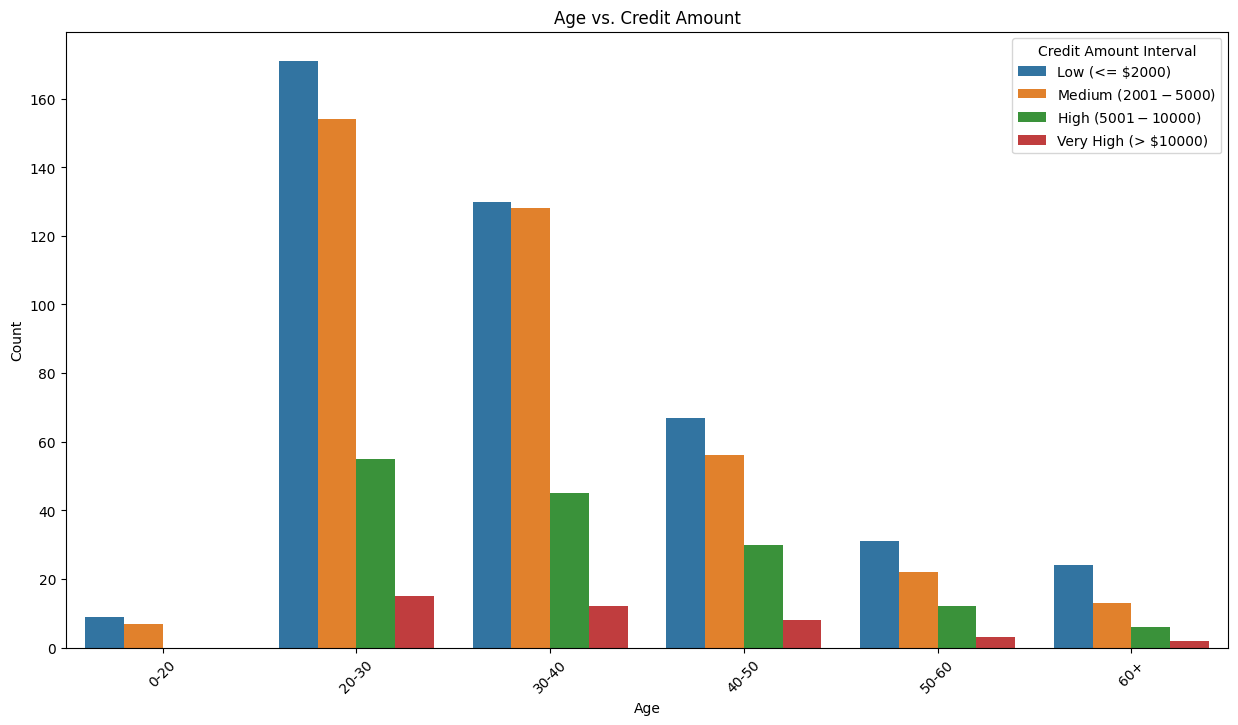

In [ ]:

# Define the interval bins for credit amount
bins = [0, 2000, 5000, 10000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
labels = ['Low (<= $2000)', 'Medium ($2001 - $5000)', 'High ($5001 - $10000)', 'Very High (> $10000)']


# Create a new column with the credit amount intervals
data['Credit Amount Interval'] = pd.cut(data['Credit amount'], bins=bins, labels=labels, right=False)

# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
data['Age Interval'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Set the figure size
plt.figure(figsize=(15, 8))

# Age vs. Credit Amount
sns.countplot(data=data, x='Age Interval', hue='Credit Amount Interval')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs. Credit Amount')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()




In [ ]:
# Define the interval bins for credit amount
bins = [0, 2000, 5000, 10000, np.inf]
labels = ['Low (<= $2000)', 'Medium ($2001 - $5000)', 'High ($5001 - $10000)', 'Very High (> $10000)']

# Create a new column with the credit amount intervals
df['Credit Amount Interval'] = pd.cut(df['Credit amount'], bins=bins, labels=labels, right=False)

# Define the age intervals
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the 'Age' column into intervals
df['Age Interval'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Group the data by 'Age Interval' and 'Credit Amount Interval' and count the occurrences
counts = df.groupby(['Age Interval', 'Credit Amount Interval']).size().reset_index(name='Count')

# Set the figure size
fig = go.Figure()

# Add a trace for each 'Age Interval' and 'Credit Amount Interval' combination
for age_interval in age_labels:
    filtered_data = counts[counts['Age Interval'] == age_interval]
    fig.add_trace(go.Bar(
        x=filtered_data['Credit Amount Interval'],
        y=filtered_data['Count'],
        name=age_interval
    ))

# Set the layout
fig.update_layout(
    xaxis_title='Credit Amount Interval',
    yaxis_title='Count',
    title='Age vs. Credit Amount',
    barmode='stack',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()

Age vs Purpose

In [ ]:
# Set the figure size
fig = go.Figure()

# Create the boxplot trace
fig.add_trace(go.Box(
    x=df['Purpose'],
    y=df['Age'],
    name='Age',
    boxmean=True
))

# Set the layout
fig.update_layout(
    xaxis_title='Purpose',
    yaxis_title='Age',
    title='Purpose vs. Age',
    xaxis=dict(tickangle=45)
)

# Show the plot
fig.show()


In [ ]:
# Create age intervals
age_intervals = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')])

# Convert age intervals to strings
age_intervals = age_intervals.astype(str)

# Group data by age intervals and purpose
age_purpose_counts = df.groupby([age_intervals, 'Purpose']).size().unstack()

# Transpose the DataFrame for plotting
age_purpose_counts = age_purpose_counts.T

# Create the stacked bar chart traces
data = []
for column in age_purpose_counts.columns:
    trace = go.Bar(
        x=age_purpose_counts.index,
        y=age_purpose_counts[column],
        name=column
    )
    data.append(trace)

# Set the layout
layout = go.Layout(
    barmode='stack',
    xaxis=dict(title='Purpose'),
    yaxis=dict(title='Count'),
    title='Distribution of Purpose by Age Intervals',
    showlegend=True,
    legend=dict(title='Age Intervals')
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()


Purpose vs Job

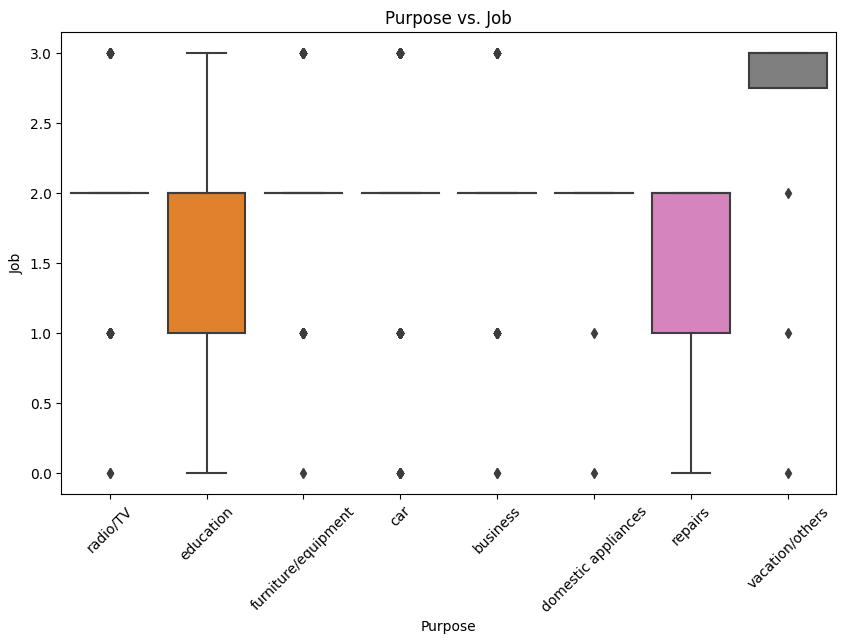

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'


# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Purpose', y='Job')

# Set the labels and title
plt.xlabel('Purpose')
plt.ylabel('Job')
plt.title('Purpose vs. Job')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create the boxplot trace
trace = go.Box(
    x=df['Purpose'],
    y=df['Job'],
    boxpoints='all',
    jitter=0.5,
    pointpos=-1.8,
    marker=dict(
        color='rgb(107, 174, 214)',
        symbol='circle',
        line=dict(
            color='rgb(0, 0, 0)',
            width=1
        ),
    ),
    line=dict(
        color='rgb(107, 174, 214)',
        width=1
    )
)

# Create the layout
layout = go.Layout(
    title='Purpose vs. Job',
    xaxis=dict(title='Purpose'),
    yaxis=dict(title='Job'),
    showlegend=False
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()

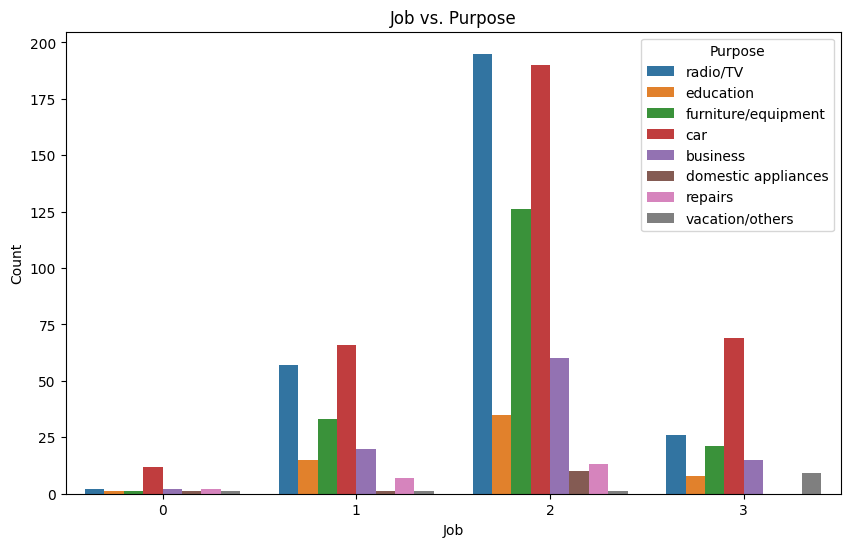

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.countplot(data=df, x='Job', hue='Purpose')

# Set the labels and title
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs. Purpose')

# Show the plot
plt.show()


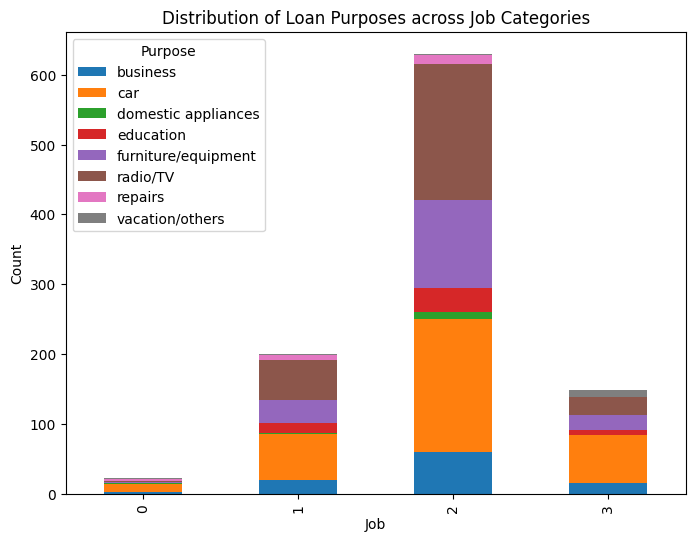

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(data['Job'], data['Purpose'])

# Visualize the contingency table using a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the labels and title
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes across Job Categories')

# Show the plot
plt.show()

Purpose vs sex

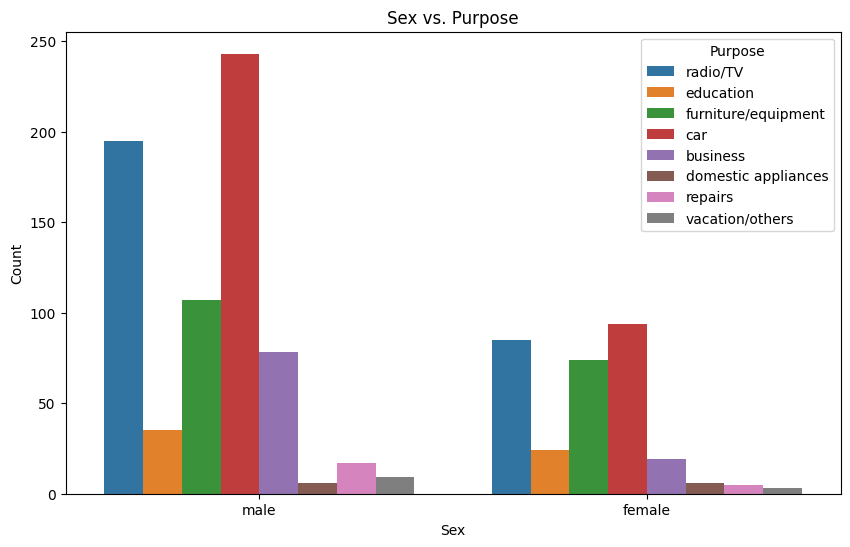

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'


# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.countplot(data=df, x='Sex', hue='Purpose')

# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex vs. Purpose')

# Show the plot
plt.show()


In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'

import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Purpose', y='Sex')

# Set the labels and title
plt.xlabel('Purpose')
plt.ylabel('Sex')
plt.title('Purpose vs. Sex')

# Show the plot
plt.show()


TypeError: ignored

<Figure size 1000x600 with 0 Axes>

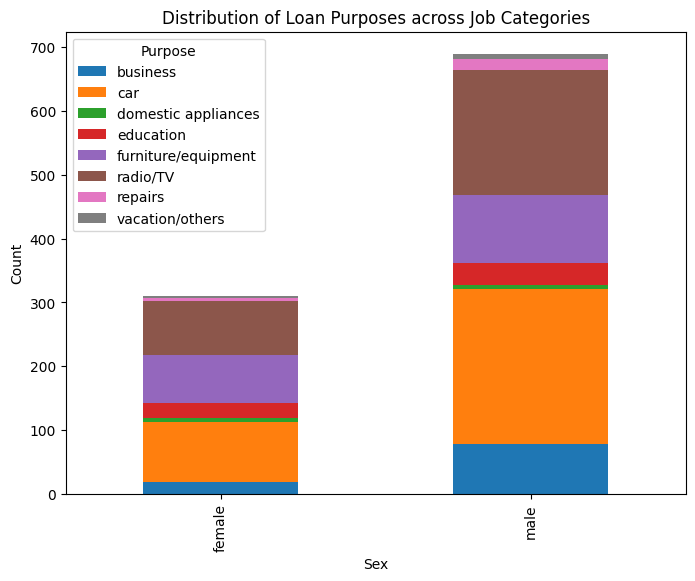

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Sex'], df['Purpose'])

# Visualize the contingency table using a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Loan Purposes across Job Categories')

# Show the plot
plt.show()

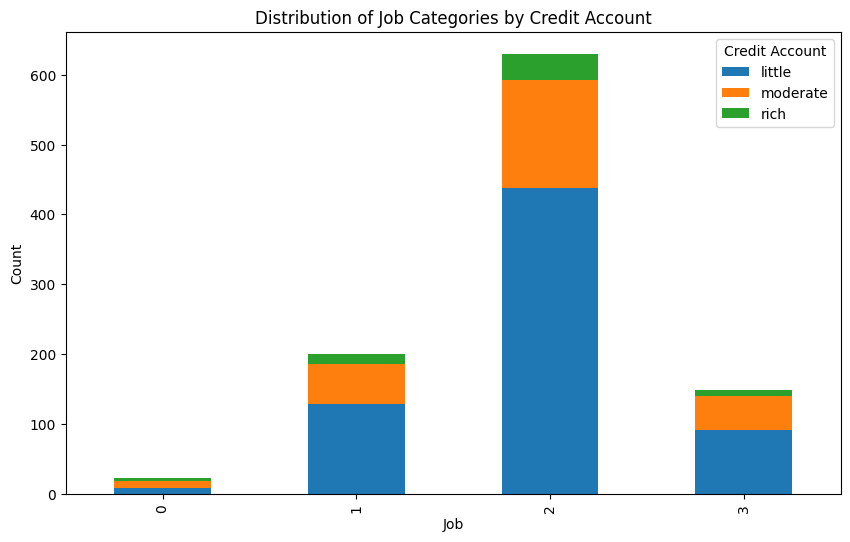

In [ ]:

# Group data by Job and Credit account
job_credit_counts = df.groupby(['Job', 'Checking account']).size().unstack()

# Plotting stacked bar chart
ax = job_credit_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_title('Distribution of Job Categories by Credit Account')

# Show the legend
ax.legend(title='Credit Account')

# Display the chart
plt.show()


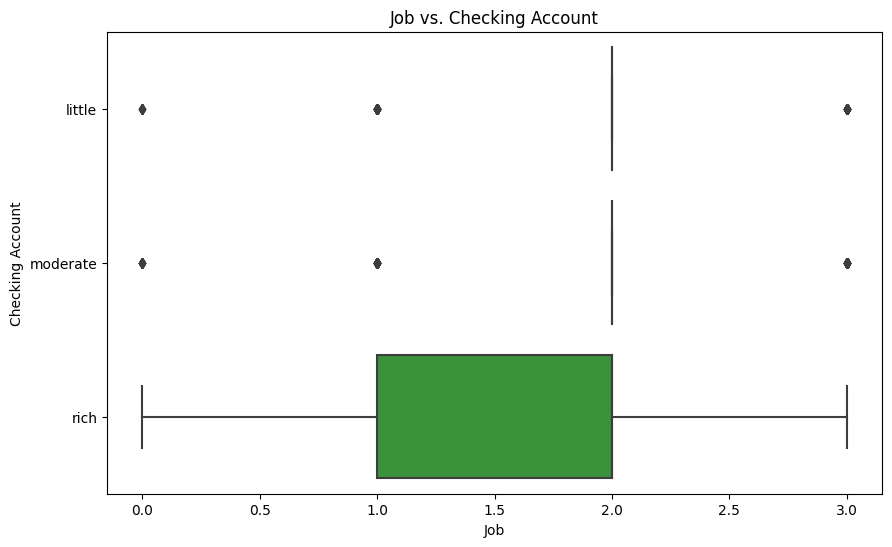

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Job', y='Checking account')

# Set the labels and title
plt.xlabel('Job')
plt.ylabel('Checking Account')
plt.title('Job vs. Checking Account')

# Show the plot
plt.show()


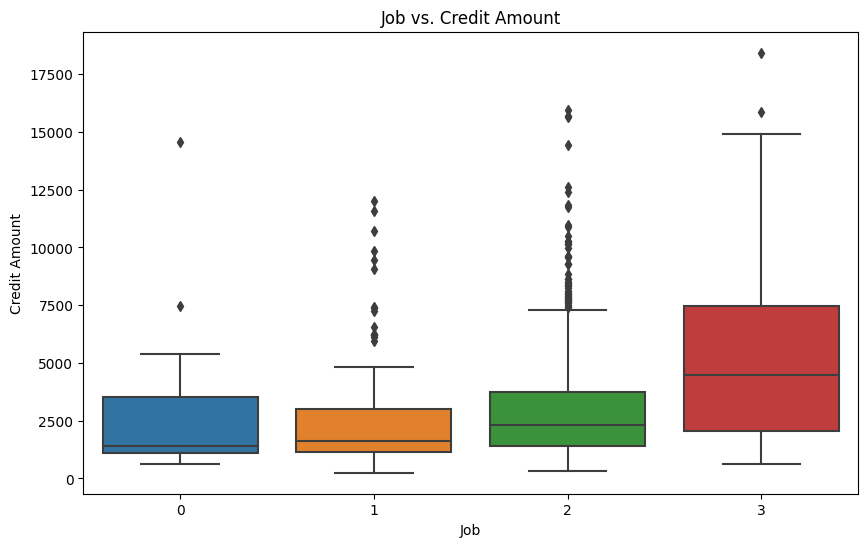

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Job', y='Credit amount')

# Set the labels and title
plt.xlabel('Job')
plt.ylabel('Credit Amount')
plt.title('Job vs. Credit Amount')

# Show the plot
plt.show()


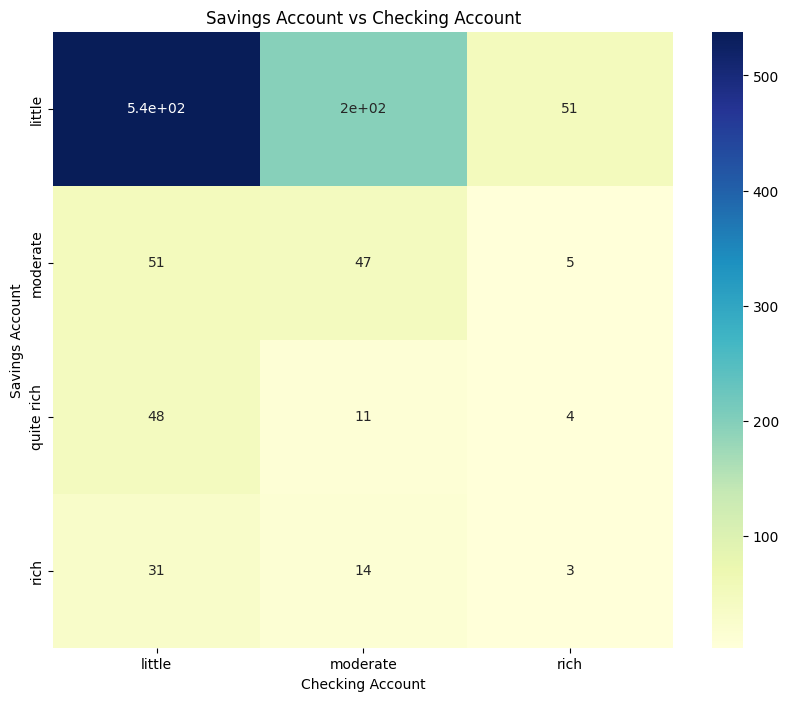

In [ ]:
# Create a cross-tabulation of Savings Account and Checking Account
cross_tab = pd.crosstab(df['Saving accounts'], df['Checking account'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')

# Set labels and title
plt.xlabel('Checking Account')
plt.ylabel('Savings Account')
plt.title('Savings Account vs Checking Account')

# Display the plot
plt.show()

In [ ]:
!pip install chart-studio plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[4, 5, 6]))

# Show the plot
fig.show()


In [ ]:
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot



radio_tv = np.sum(df['Credit amount'].loc[df['Purpose'] == 'radio/TV'].values)
education = np.sum(df['Credit amount'].loc[df['Purpose'] == 'education'].values)
furniture = np.sum(df['Credit amount'].loc[df['Purpose'] == 'furniture/equipment'].values)
car = np.sum(df['Credit amount'].loc[df['Purpose'] == 'car'].values)
business = np.sum(df['Credit amount'].loc[df['Purpose'] == 'business'].values)
domestic_app = np.sum(df['Credit amount'].loc[df['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(df['Credit amount'].loc[df['Purpose'] == 'repairs'].values)
vacation_others = np.sum(df['Credit amount'].loc[df['Purpose'] == 'vacation/others'].values)

df_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=df["Purpose"].unique())

print(df_purposes)

data = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = df['Purpose'].unique().tolist(),
        line = dict(
            color = "#ff7f50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8090c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)"
)

fig.show()

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


AttributeError: ignored

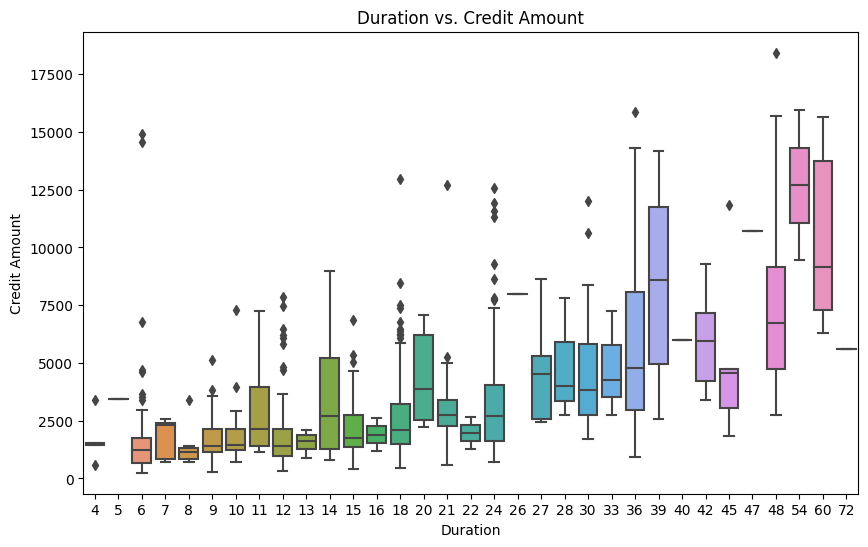

In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'



# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Duration', y='Credit amount')

# Set the labels and title
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.title('Duration vs. Credit Amount')

# Show the plot
plt.show()


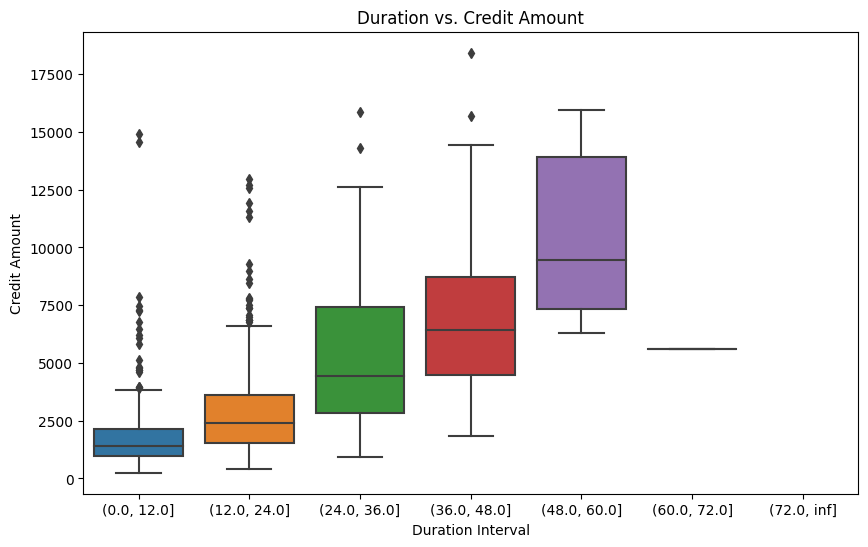

In [ ]:


# Define the interval bins for duration
bins = [0, 12, 24, 36, 48, 60, 72, float('inf')]

# Create a new column with the duration intervals
df['Duration Interval'] = pd.cut(df['Duration'], bins=bins)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df, x='Duration Interval', y='Credit amount')

# Set the labels and title
plt.xlabel('Duration Interval')
plt.ylabel('Credit Amount')
plt.title('Duration vs. Credit Amount')

# Show the plot
plt.show()
